In [18]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
 # reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

In [10]:
#Looking at column names in Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d2ce690198>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
#Looking at column names in Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d2ce690b70>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [ ]:
#### Precipitation Analysis ####

In [12]:
#What's the most recent date in the data set?
max_date = pd.to_datetime(session.query(Measurement.date).order_by(Measurement.date.desc()).first())
max_date

DatetimeIndex(['2017-08-23'], dtype='datetime64[ns]', freq=None)

In [13]:
#What's the date a year before that?
year_before= max_date - pd.DateOffset(years=1)
year_before
year_before_date = year_before[0]
year_before_date

Timestamp('2016-08-23 00:00:00')

In [14]:
#Querying for the precipitation from the last year and storing as a variable
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= '2016-08-23')


In [15]:
#Putting query results into a dataframe
precip_df = pd.DataFrame(results, columns=['date','prcp'])
pd.to_datetime(precip_df['date'], format='%Y-%m-%d')
precip_df.set_index('date', inplace=True, )



In [16]:
#Sorting dataframe by the date
precip_df.sort_values(['date'], ascending=True)


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


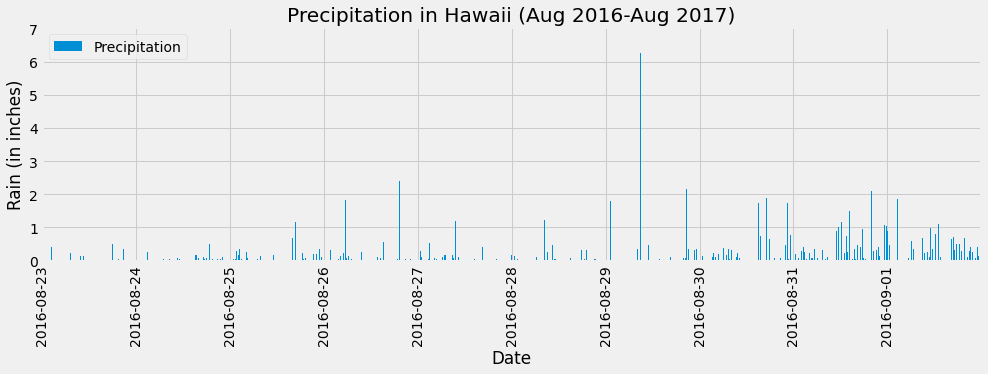

<Figure size 432x288 with 0 Axes>

In [22]:
#Plotting the precipitation dataframe with pandas
precip_df.plot(kind="bar", figsize= (15,4))


plt.title("Precipitation in Hawaii (Aug 2016-Aug 2017)")

# Without the below code (locator_params, we get so many tick labels, it's just a black blob. 
#But the below code doesn't give the correct dates. It only gives us the first ten dates that are indexed.
plt.locator_params(axis="x", nbins=10)

plt.xlabel("Date")
plt.ylabel("Rain (in inches)")

plt. legend(('Precipitation', ), loc='upper left')

plt.show()
plt.tight_layout()

In [23]:
#Summary statistics of the data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#### Station Analysis Work ####

In [30]:
#Total number of stations in the dataset
stationCount = session.query(Station.station).group_by(Station.station).count()
stationCount

9

In [37]:
#List stations and the observation counts in descending order
results = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.id).desc())

for result in results:
    print(result)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [ ]:
#Station id with the highest number of observations is USC00519281

In [42]:
Observations = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').group_by(Measurement.station)

for observation in Observations:
    print(observation)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [ ]:
session.close()